<a href="https://colab.research.google.com/github/NU-OsburnLab/Example_Scripts/blob/main/Lipidomics_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and load the R to Python integration tool

In [ ]:
%load_ext rpy2.ipython

Load the necessary R libraries

In [ ]:
%%R ## This piece of code must be run at the beginning of each cell that will run the R language
library(tidyverse)


✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Import and wrangle lipidomics data from MS Dial

In [ ]:
%%R 
url1 <- read.csv('https://raw.githubusercontent.com/FloydNichols97/LC-QTOF-MS/main/Cell_Cultures.csv')
data <- url1

data[c('Category', 'Core')] <- str_split_fixed(data$Metabolite_name, ' ', 2)

relative <- gather(data, Sample, Quantification, 'blank_01':`POS_u2_y_IPLs`, factor_key = TRUE) %>% 
  filter(Sample != "blank_01" & Sample != "blank_02" & Sample != "blank_03" & Sample != "blank_04") %>% 
  filter(Category != "Unknown" & Category != "w/o")

Visualize lipidomics data

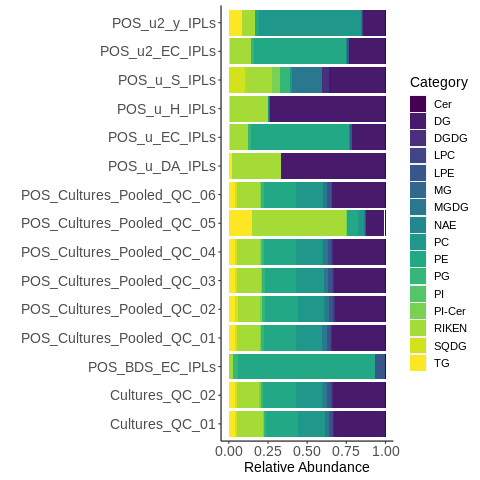

In [ ]:
%%R 
relative_abundance <- ggplot(data = relative, aes(fill = Category, y = Sample, x = Quantification)) + 
  geom_bar(position = "fill", stat = 'identity') + 
  scale_fill_viridis_d() + 
  labs(x = "Relative Abundance", y = '') +
  theme(panel.background = element_blank(),
        text = element_text(size=14),
        axis.text=element_text(size = 14),
        axis.line = element_line(linetype = "solid"))
ggsave("Relative_Abundance.png", dpi = 300, width = 16, height = 12)

plot(relative_abundance)